#### Fourier Transform:

- Fourier Transform is used to analyze the frequency characteristics of various filters. 

- For images, 2D Discrete Fourier Transform (DFT) is used to find the frequency domain. 

- A fast algorithm called Fast Fourier Transform (FFT) is used for calculation of DFT

- For a sinusoidal signal, 𝑥(𝑡) = 𝐴sin(2𝜋𝑓𝑡), we can say 𝑓 is the frequency of signal, and if its frequency domain is taken, we can see a spike at 𝑓. 
- If signal is sampled to form a discrete signal, we get the same frequency domain, but is periodic in the range [−𝜋, 𝜋] or [0, 2𝜋] (or [0,𝑁] for N-point DFT).
- You can consider an image as a signal which is sampled in two directions. 
- So taking fourier transform in both X and Y directions gives you the frequency representation of image.

#### Fouries transform in NumPy

- numpy has FFt package to do this.
- np.fft.fft2() provides us the frequency transform which will be a complex array
##### parameters
- first one is input image which is grayscale.
- second one is padded with zeros before calculaion of FFT 
    - If it is less than input image, input image will be cropped
- If no argument passed, output array size will be same as input


- Now once you got the result, zero frequency component (DC component) will be at top left corner. If you want to bring it to center, you need to shift the result by 𝑁/2 in both the directions. This is simply done by the function,np.fft.fftshift(). (It is more easier to analyze). Once you found the frequency transform, you can find the magnitude spectrum.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

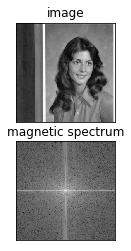

In [9]:
img=cv2.imread("standard_test_images\\standard_test_images\\1.tif",0)

fourier=np.fft.fft2(img)
fshift=np.fft.fftshift(fourier)
magnitude_spe=20*np.log(np.abs(fshift))

plt.subplot(211), plt.imshow(img,cmap='gray'), plt.title("image"), plt.xticks([]),plt.yticks([])
plt.subplot(212), plt.imshow(magnitude_spe,cmap='gray'), plt.title("magnetic spectrum") , plt.xticks([]),plt.yticks([])
plt.show()

we can see more white region at the center showing low frequency content is more

- So we found the frequency transform.
- Now we can do some operations in frequency domain, like high pass filtering and reconstruct the image, ie find inverse DFT. For that you simply remove the low frequencies by masking with a rectangular window of size 60x60. Then apply the inverse shift using np.fft.ifftshift() so that DC component again come at the top-left corner. Then find inverse FFT using np.ifft2() function.

In [14]:
row,col=img.shape
r,c=row/2, col/2
r,c


(128.0, 128.0)

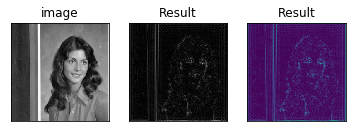

In [17]:
rows,cols=img.shape

hrow,hcol=int(rows/2),int(cols/2)
fshift[hrow-30:hrow+30, hcol-30:hcol+30]=0
f_invshift=np.fft.ifftshift(fshift)
img_back=np.fft.ifft2(f_invshift)
img_back=np.abs(img_back)

plt.subplot(131), plt.imshow(img,cmap='gray'), plt.title("image"), plt.xticks([]),plt.yticks([])
plt.subplot(132), plt.imshow(img_back,cmap='gray'), plt.title("Result") , plt.xticks([]),plt.yticks([])
plt.subplot(133), plt.imshow(img_back), plt.title("Result") , plt.xticks([]),plt.yticks([])

plt.show()
